## Hypothesis
To predict the incentive level requested for lowering thermostat settings for 2-3F 
    when being at home in winter.
    
DV: IncHomeW    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [267]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [81] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [86] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [91] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [96] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
[101] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[106] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [268]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [269]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeS", "AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 104
[1] 490 104


In [270]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeW",
"Winter_avgF",
"CashYN")

In [271]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeW"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [76] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [81] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [86] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [91] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
 [96] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "CashYN"      "ComfNW"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Frugal"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeW"       "HouseholdS"  "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Trust"       "Winter_avgF"

In [272]:
data1 <- data2[, which(names(data2) %in% c("IncHomeW",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "CashYN"      "ComfNW"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeW"       "HouseholdS"  "IncHomeW"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "SubNorm"     "Winter_avgF"

In [273]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [274]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [275]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeW"       "IncHomeW"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "PBC"         "CashYN"     
[16] "MC"          "ComfNW"      "Atti"        "SubNorm"     "SN"         
[21] "HabitG"      "HabitC"      "Winter_avgF"

In [276]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [277]:
#convert all data to numeric values

sapply(data2,sd)

HomeW    IncHomeW         Age      Gender     OwnRent    SqftCate 
       3.36        4.62       11.23        0.50        0.51        1.13 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.21        0.85        0.35        1.98        1.12        5.09 
    EnergyC         PBC      CashYN          MC      ComfNW        Atti 
       1.39        0.93        0.28        1.08        1.71        1.08 
    SubNorm          SN      HabitG      HabitC Winter_avgF 
       1.34        1.40        1.16        1.38       11.43

In [278]:
hiCor(data2,.7)

,Latitude,Winter_avgF
Latitude,1.00,-0.85
Winter_avgF,-0.85,1.00


In [303]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:23];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:23){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    EnergyC   PBC    MC  Atti SubNorm    SN HabitG HabitC
PC1    -0.4 -0.24 -0.34 -0.43   -0.36 -0.21  -0.31  -0.26
[1] 0.23
     Age OwnRent SqftCate HouseholdS Income
PC2 0.34    0.48     0.49       0.23   0.42
[1] 0.32
    HomeW HouseholdS Ethnic Latitude ComfNW HabitC Winter_avgF
PC3  0.44       0.21  -0.25    -0.46   0.28  -0.24        0.48
[1] 0.39
    Gender HouseholdS Latitude ComfNW Winter_avgF
PC4  -0.28      -0.37    -0.45  -0.39        0.42
[1] 0.45
    HouseholdS Political Ethnic Income Educ EnergyC   PBC HabitG
PC5      -0.21      0.53  -0.22   0.25 0.42    0.29 -0.29  -0.31
[1] 0.5
    IncHomeW  Age HouseholdS Ethnic CashYN   MC ComfNW    SN HabitC
PC6      0.5 0.41      -0.26   0.24   0.32 0.23   0.23 -0.29  -0.23
[1] 0.55
    IncHomeW   Age Gender Income Educ  PBC CashYN
PC7    -0.27 -0.24  -0.34   0.34 0.22 0.29   0.56
[1] 0.6
    IncHomeW  Age Gender SubNorm    SN
PC8    -0.61 0.25   0.54   -0.26 -0.34
[1] 0.64
    HomeW HouseholdS Educ EnergyC CashYN ComfNW

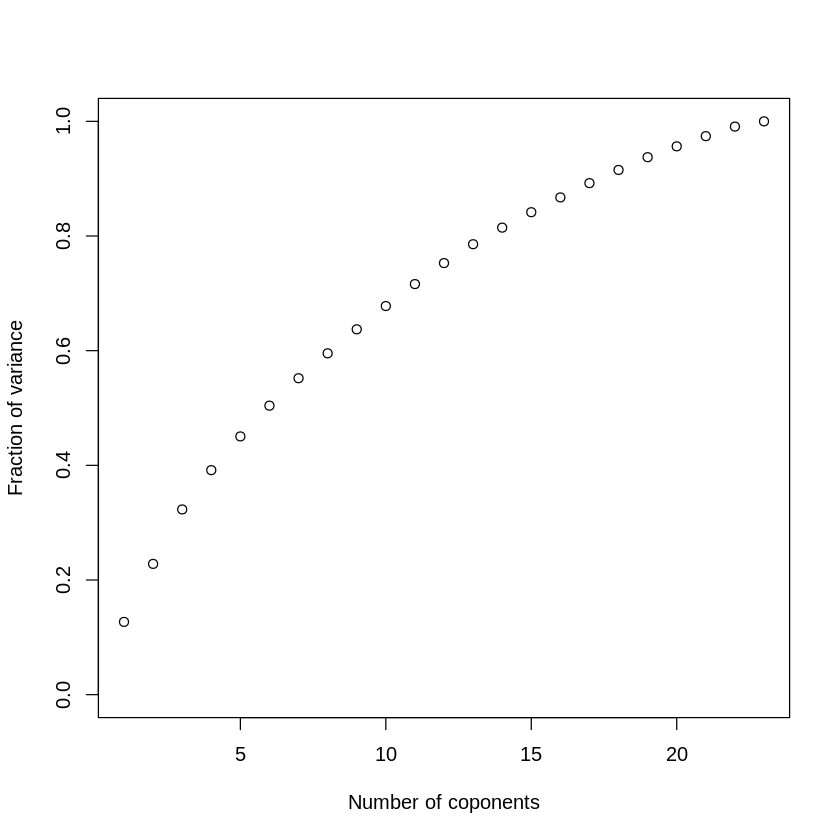

In [280]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [281]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [282]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Winter_avgF,23,0.62
Latitude,12,0.61
Atti,18,0.44
SqftCate,6,0.42
EnergyC,13,0.39
OwnRent,5,0.35
Income,10,0.30
SubNorm,19,0.27
HouseholdS,7,0.26
HabitC,22,0.26
MC,16,0.25


In [283]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeW    IncHomeW         Age      Gender     OwnRent    SqftCate 
       0.91        1.00        1.00        0.92        0.99        0.99 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       0.99        0.95        0.95        0.99        0.98        0.28 
    EnergyC         PBC      CashYN          MC      ComfNW        Atti 
       0.55        0.90        0.99        0.75        0.99        0.44 
    SubNorm          SN      HabitG      HabitC Winter_avgF 
       0.73        0.92        0.83        0.88        0.18 

Loadings:
            Factor1 Factor2
EnergyC      0.66          
Atti         0.75          
SubNorm      0.52          
Latitude            -0.84  
Winter_avgF          0.90  
HomeW                0.30  
IncHomeW                   
Age                        
Gender                     
OwnRent                    
SqftCate                   
HouseholdS      

In [284]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [285]:
#Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
#    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC, Winter_avgF

In [304]:
#IndepPred = c('Age', 'Gender', 'OwnRent', 'HouseholdS', 'Educ', 'Income', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF', 'Atti', 'PBC', 'SubNorm')
IndepPred = c('EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF')

In [305]:
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));

In [306]:
table(data2[,"IncHomeW"])


  1   2   3   4   5   6   7   8  99 
 32  33  66 167  62  59  46  24   1 

In [307]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.96  -1.45  -0.28   1.03  92.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.94337    1.57303    2.51    0.013 * 
EnergyC      0.12147    0.15505    0.78    0.434   
MC           0.26061    0.20272    1.29    0.199   
ComfNW       0.11670    0.12739    0.92    0.360   
HabitC      -0.45348    0.16068   -2.82    0.005 **
Winter_avgF  0.00906    0.01833    0.49    0.621   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.6 on 484 degrees of freedom
Multiple R-squared:  0.0261,	Adjusted R-squared:  0.0161 
F-statistic:  2.6 on 5 and 484 DF,  p-value: 0.0247


In [308]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,10.3,10.3,0.49,0.4833
MC,1,18.7,18.7,0.89,0.3463
ComfNW,1,68.2,68.2,3.24,0.0724
HabitC,1,170.7,170.7,8.12,0.0046
Winter_avgF,1,5.1,5.1,0.24,0.6214
Residuals,484,10172.8,21.0,NA,NA


In [309]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<40)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    40)

Residuals:
   Min     1Q Median     3Q    Max 
-3.943 -1.147 -0.214  1.120  4.077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.70949    0.92967    3.99  8.4e-05 ***
EnergyC      0.05761    0.07966    0.72    0.470    
MC           0.06999    0.10096    0.69    0.489    
ComfNW       0.14872    0.06470    2.30    0.022 *  
HabitC      -0.07446    0.08291   -0.90    0.370    
Winter_avgF -0.00557    0.01581   -0.35    0.725    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.8 on 284 degrees of freedom
Multiple R-squared:  0.0307,	Adjusted R-squared:  0.0137 
F-statistic:  1.8 on 5 and 284 DF,  p-value: 0.113


In [310]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,0.83,0.83,0.26,0.6125
MC,1,0.77,0.77,0.24,0.6251
ComfNW,1,24.56,24.56,7.64,0.0061
HabitC,1,2.42,2.42,0.75,0.3866
Winter_avgF,1,0.40,0.40,0.12,0.7248
Residuals,284,913.54,3.22,NA,NA


In [311]:
#added CashYN to model
#IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF', 'CashYN')
IndepPred = c('EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF', 'CashYN')
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));

In [312]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -4.93  -1.45  -0.29   1.04  92.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.92432    1.68445    2.33   0.0202 * 
EnergyC      0.12130    0.15529    0.78   0.4351   
MC           0.26000    0.20381    1.28   0.2027   
ComfNW       0.11673    0.12752    0.92   0.3604   
HabitC      -0.45306    0.16138   -2.81   0.0052 **
Winter_avgF  0.00904    0.01835    0.49   0.6226   
CashYNTRUE   0.02380    0.74731    0.03   0.9746   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.6 on 483 degrees of freedom
Multiple R-squared:  0.0261,	Adjusted R-squared:  0.014 
F-statistic: 2.16 on 6 and 483 DF,  p-value: 0.0455


In [313]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,1.0e+01,10.343,0.491,0.4838
MC,1,1.9e+01,18.679,0.887,0.3468
ComfNW,1,6.8e+01,68.157,3.236,0.0727
HabitC,1,1.7e+02,170.748,8.107,0.0046
Winter_avgF,1,5.1e+00,5.133,0.244,0.6218
CashYN,1,2.1e-02,0.021,0.001,0.9746
Residuals,483,1.0e+04,21.062,NA,NA


In [314]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<40)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    40)

Residuals:
   Min     1Q Median     3Q    Max 
-3.940 -1.144 -0.208  1.126  4.087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74790    0.98264    3.81  0.00017 ***
EnergyC      0.05827    0.07998    0.73  0.46690    
MC           0.07077    0.10134    0.70  0.48551    
ComfNW       0.14827    0.06492    2.28  0.02312 *  
HabitC      -0.07553    0.08351   -0.90  0.36651    
Winter_avgF -0.00555    0.01584   -0.35  0.72643    
CashYNTRUE  -0.04424    0.36102   -0.12  0.90256    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.8 on 283 degrees of freedom
Multiple R-squared:  0.0308,	Adjusted R-squared:  0.0102 
F-statistic:  1.5 on 6 and 283 DF,  p-value: 0.178


In [315]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,0.827,0.827,0.256,0.6131
MC,1,0.770,0.770,0.238,0.6257
ComfNW,1,24.561,24.561,7.609,0.0062
HabitC,1,2.419,2.419,0.749,0.3874
Winter_avgF,1,0.399,0.399,0.124,0.7253
CashYN,1,0.048,0.048,0.015,0.9026
Residuals,283,913.489,3.228,NA,NA
